In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jan  3 10:29:45 2023

@author: bzfkostr
"""


import numpy as np
import multiprocessing
from multiprocessing import Pool
from functools import partial
import math
from multiprocessing import Pool
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon
from matplotlib.colors import LinearSegmentedColormap




#%%
# calculate numerically first and second moments

def fct_std(T,mu,w,l,g, omega): # T: number of timesteps, mu: social learning rate, w: intertial factor, l=local best, g=global best, domain=[-omega, omega]
    p=(l+g)/2
    
    # operator: Z_t+1=MZ_t+b
    
    M=np.array([[1+w-mu, -w,0,0,0],
                [1,0,0,0,0],
                [p*4*(mu/2*(1+w)-(mu**2)/3-(mu/2)**2), -4*mu/2*w*p, (1+w)**2-4*mu/2*(1+w)+2*(mu**2)/3+2*(mu/2)**2,  2*w*(2*(mu/2)-(1+w)),w**2],
                [mu*p,0,(1+w)-mu,-w,0],
                [0,0,1,0,0],
                ])
    
    
    
    b=np.array([mu*p, 
                0, 
                ((mu**2)/3)*(l**2)+2*((mu/2)**2)*l*g+((mu**2)/3)*(g**2),
                0,
                0])
   
    
  
    #
    Z=np.zeros((5,T)) # vector of moments
    
    Z0=np.array([mu*p, 0, (7*mu**2-12*mu+6*w**2+6/18)*(omega)**2+(mu)*mu*((p*2)**2)/3, 1/3*(1-mu)*omega**2, 1/3*omega**2]) # starting point
    Z[:,0]=Z0
    
    
    # iteration
    for t in range(T-1):
        Z[:,t+1]=M.dot(Z[:,t])+b

    # calculate standart deviation from calculated moments
    
    STD=np.zeros(T)
    for t in range(T-1):
        STD[t+1]=np.sqrt(Z[2,t+1]-(Z[0,t+1])**2)
    

    zstar=np.linalg.inv(np.identity(5)-M).dot(b)
    
    return Z,STD



#%%
def C():
    
    w=0.85
    mu=1.4
    
    return w, mu

def A():

    mu=2.2
    w=0.7
    
    return w, mu

def B():
    
    w=0.95
    mu=1
    
    return w, mu
    
w_A, mu_A=A()
w_B, mu_B=B()
w_C, mu_C=C()

w_overdamped, mu_overdamped=0.7, 1.4 # overdamped PSO parameters
phi_overdamped=mu_overdamped

w_damped, mu_damped=0.958058, 0.3215 # damped PSO parameters
phi_damped=mu_damped

w_divergent, mu_divergent=1, 0.14 # divergent oscillating PSO parameters
phi_divergent=mu_divergent
#%% Experiment Setting
T=50 # number of time steps
l=0.5 # local best position in stagnation
g=0.5 # global best position in stagnation   
omega=0.5 # range of initialiconditons of particles and velocity: x-Unif[-omega,omega], v-Unif[-omega,omega





p_overdamped=(mu_overdamped*l+phi_overdamped*g)/(mu_overdamped+phi_overdamped)
Z_overdamped, STD_overdamped=fct_std(T,mu_overdamped, w_overdamped, l,g, omega)
pst_overdamped=0.5*np.sqrt((mu_overdamped*(w_overdamped+1))/(mu_overdamped*(5*w_overdamped-7)-12*w_overdamped**2+12))*np.abs(l-g)



p_divergent=(mu_divergent*l+phi_divergent*g)/(mu_divergent+phi_divergent)
Z_divergent, STD_divergent=fct_std(T,mu_divergent, w_divergent, l,g,omega)
pst_O=0.5*np.sqrt((mu_divergent*(w_divergent+1))/(mu_divergent*(5*w_divergent-7)-12*w_divergent**2+12))*np.abs(l-g)




p_damped=(mu_damped*l+phi_damped*g)/(mu_damped+phi_damped)
Z_damped, STD_damped=fct_std(T,mu_damped, w_damped,l,g, omega)
pst_damped=0.5*np.sqrt((mu_damped*(w_damped+1))/(mu_damped*(5*w_damped-7)-12*w_damped**2+12))*np.abs(l-g)


phi_A=mu_A
p_A=(mu_A*l+phi_A*g)/(mu_A+phi_A)
Z_A, STD_A=fct_std(T,mu_A, w_A,l,g, omega)
pst_A=0.5*np.sqrt((mu_A*(w_A+1))/(mu_A*(5*w_A-7)-12*w_A**2+12))*np.abs(l-g)

phi_B=mu_B
p_B=(mu_B*l+phi_B*g)/(mu_B+phi_B)
Z_B, STD_B=fct_std(T,mu_B, w_B,l,g, omega)
pst_B=0.5*np.sqrt((mu_B*(w_B+1))/(mu_B*(5*w_B-7)-12*w_B**2+12))*np.abs(l-g)

phi_C=mu_C
p_C=(mu_C*l+phi_A*g)/(mu_C+phi_C)
Z_C, STD_C=fct_std(T,mu_C, w_C,l,g, omega)
pst_C=0.5*np.sqrt((mu_C*(w_C+1))/(mu_C*(5*w_C-7)-12*w_C**2+12))*np.abs(l-g)




/tmp/ipykernel_185/2470048803.py:125: RuntimeWarning: invalid value encountered in sqrt
  pst_O=0.5*np.sqrt((mu_divergent*(w_divergent+1))/(mu_divergent*(5*w_divergent-7)-12*w_divergent**2+12))*np.abs(l-g)
/tmp/ipykernel_185/2470048803.py:138: RuntimeWarning: invalid value encountered in sqrt
  pst_A=0.5*np.sqrt((mu_A*(w_A+1))/(mu_A*(5*w_A-7)-12*w_A**2+12))*np.abs(l-g)
/tmp/ipykernel_185/2470048803.py:143: RuntimeWarning: invalid value encountered in sqrt
  pst_B=0.5*np.sqrt((mu_B*(w_B+1))/(mu_B*(5*w_B-7)-12*w_B**2+12))*np.abs(l-g)
/tmp/ipykernel_185/2470048803.py:148: RuntimeWarning: invalid value encountered in sqrt
  pst_C=0.5*np.sqrt((mu_C*(w_C+1))/(mu_C*(5*w_C-7)-12*w_C**2+12))*np.abs(l-g)


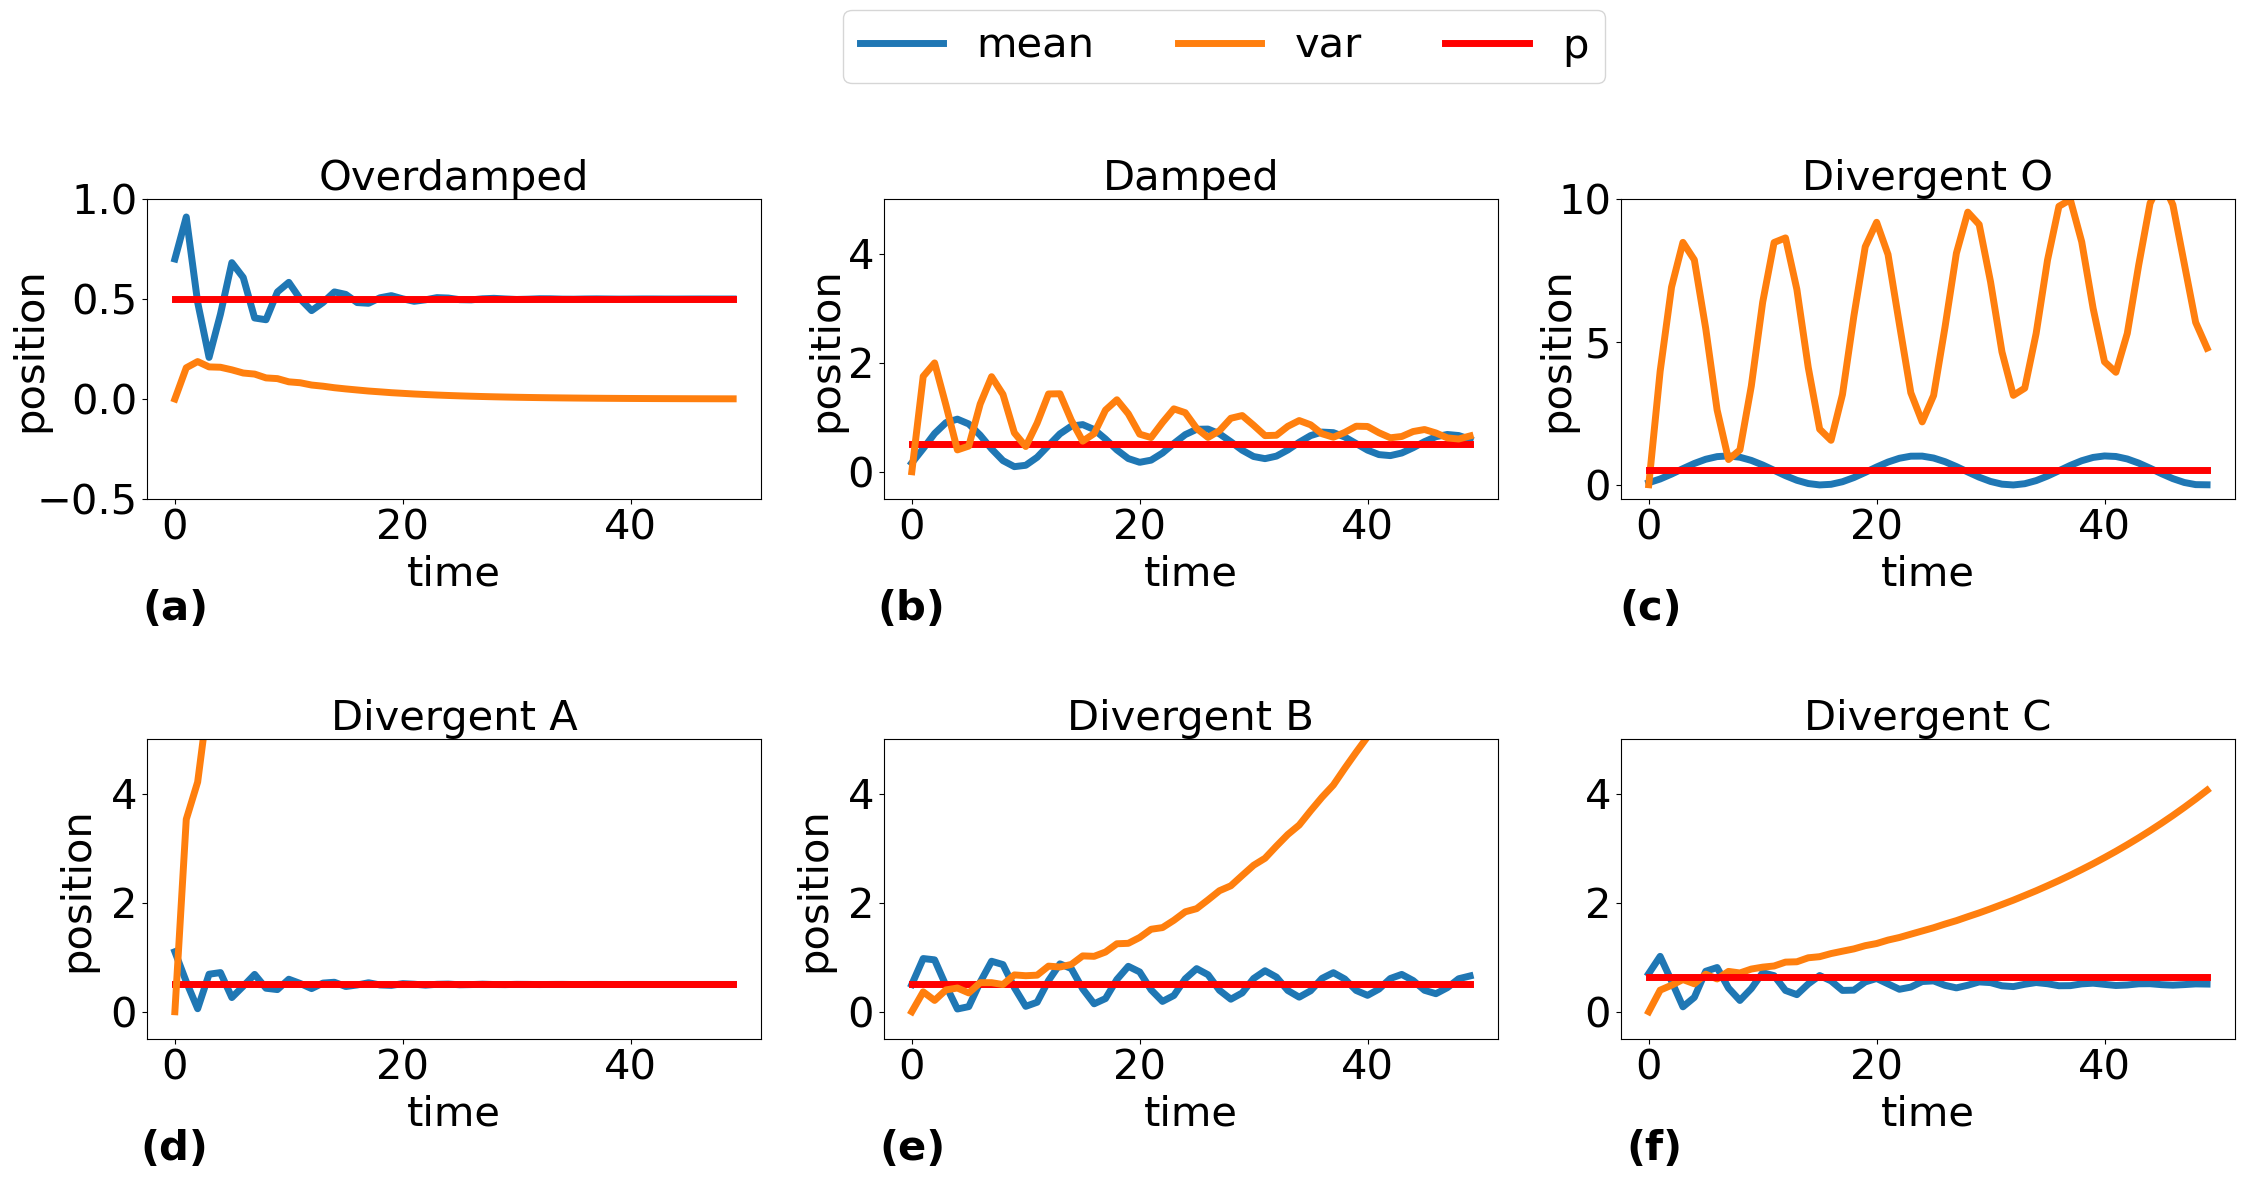

In [3]:
fig, axs = plt.subplots(2, 3, figsize=(24, 12))

# Adjust vertical spacing between rows and reduce bottom space
plt.subplots_adjust(top=0.82, bottom=0.12, left=0.08, right=0.95, hspace=0.8)  # Reduce bottom space

# overdamped statistics
axs[0,0].set_title('Overdamped', fontsize=30)
axs[0,0].plot(np.linspace(0,T-1, T), Z_overdamped[0,:], linewidth=5, label='mean')
axs[0,0].plot(np.linspace(0,T-1, T), np.ones(T)*p_overdamped,color='red', linewidth=5, label='p')
axs[0,0].plot(np.linspace(0,T-1, T), STD_overdamped**2, linewidth=5)
axs[0,0].tick_params(axis='both', which='major', labelsize=30)
axs[0,0].set_xlabel('time', fontsize=30)
axs[0,0].set_ylabel('position',labelpad=-10, fontsize=30)
axs[0,0].set_ylim(-0.5,1)

# diverg. oscillating statistics
axs[0,1].set_title('Damped', fontsize=30)
axs[0,1].plot(np.linspace(0,T-1, T), Z_damped[0,:],linewidth=5)
axs[0,1].plot(np.linspace(0,T-1, T), np.ones(T)*p_damped,linewidth=5,color='red')
axs[0,1].plot(np.linspace(0,T-1, T), STD_damped**2,linewidth=5, label='var')
axs[0,1].set_xlabel('time', fontsize=30)
axs[0,1].set_ylabel('position', labelpad=1,fontsize=30)
axs[0,1].tick_params(axis='both', which='major', labelsize=30)
axs[0,1].set_ylim(-0.5,5)

# damped statistics
axs[0,2].set_title('Divergent O', fontsize=30)
axs[0,2].set_ylabel('position',labelpad=-14, fontsize=30)
axs[0,2].plot(np.linspace(0,T-1, T), Z_divergent[0,:], linewidth=5,label='mean')
axs[0,2].plot(np.linspace(0,T-1, T), STD_divergent**2, linewidth=5,label='var')
axs[0,2].plot(np.linspace(0,T-1, T), np.ones(T)*p_divergent,color='red',linewidth=5, label='p')
axs[0,2].set_xlabel('time', fontsize=30)
axs[0,2].tick_params(axis='both', which='major', labelsize=30)
axs[0,2].set_ylim(-0.5,10)
axs[0,2].legend(bbox_to_anchor=(-1.3, 1.7), loc="upper left", ncol=4, prop={'size': 30})

axs[0,0].text(0.1, -0.3, '(a)', transform=axs[0,0].transAxes, fontsize=30, va='top', ha='right', weight='bold')
axs[0,1].text(0.1, -0.3, '(b)', transform=axs[0,1].transAxes, fontsize=30, va='top', ha='right',weight='bold')
axs[0,2].text(0.1, -0.3, '(c)', transform=axs[0,2].transAxes, fontsize=30, va='top', ha='right', weight='bold')

# Second row of subplots
axs[1,0].set_title('Divergent A', fontsize=30)
axs[1,0].plot(np.linspace(0,T-1, T), Z_A[0,:], linewidth=5, label='mean')
axs[1,0].plot(np.linspace(0,T-1, T), np.ones(T)*p_A,color='red', linewidth=5, label='p')
axs[1,0].plot(np.linspace(0,T-1, T), STD_A**2, linewidth=5)
axs[1,0].tick_params(axis='both', which='major', labelsize=30)
axs[1,0].set_xlabel('time', fontsize=30)
axs[1,0].set_ylabel('position', labelpad=10, fontsize=30, loc='center')
axs[1,0].set_ylim(-0.5,5)

# diverg. oscillating statistics
axs[1,1].set_title('Divergent B', fontsize=30)
axs[1,1].plot(np.linspace(0,T-1, T), Z_B[0,:],linewidth=5)
axs[1,1].plot(np.linspace(0,T-1, T), np.ones(T)*p_B,linewidth=5,color='red')
axs[1,1].plot(np.linspace(0,T-1, T), STD_B**2,linewidth=5, label='var')
axs[1,1].set_xlabel('time', fontsize=30)
axs[1,1].set_ylabel('position', labelpad=10, fontsize=30, loc='center')
axs[1,1].tick_params(axis='both', which='major', labelsize=30)
axs[1,1].set_ylim(-0.5,5)

# damped statistics
axs[1,2].set_title('Divergent C', fontsize=30)
axs[1,2].plot(np.linspace(0,T-1, T), Z_C[0,:], linewidth=5,label='mean')
axs[1,2].plot(np.linspace(0,T-1, T), STD_C**2, linewidth=5,label='var')
axs[1,2].plot(np.linspace(0,T-1, T), np.ones(T)*p_C,color='red',linewidth=5, label='p')
axs[1,2].set_xlabel('time', fontsize=30)
axs[1,2].tick_params(axis='both', which='major', labelsize=30)
axs[1,2].set_ylim(-0.5,5)

axs[1,0].text(0.1, -0.3, '(d)', transform=axs[1,0].transAxes, fontsize=30, va='top', ha='right', weight='bold')
axs[1,1].text(0.1, -0.3, '(e)', transform=axs[1,1].transAxes, fontsize=30, va='top', ha='right',weight='bold')
axs[1,2].text(0.1, -0.3, '(f)', transform=axs[1,2].transAxes, fontsize=30, va='top', ha='right', weight='bold')

plt.savefig('Fig6.png')

